## Mineração de *Tweets*
Dados coletados durante o domingo (17/04/2015) de votação do Congresso para a continuação do processo de Impeachment da senhora Presidente Dilma Rousseff.


In [4]:
%matplotlib inline

import json
import pandas as pd
import matplotlib as mpl
print 'OK!1'

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rcParams
from mpltools import style
from matplotlib import dates
from datetime import datetime
import seaborn as sns
import time
import os
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

print 'OK!2'

OK!1
OK!2


In [5]:
# Seaborn plots
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
# for R lovers :)
style.use('ggplot')
rcParams['axes.labelsize'] = 9
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['legend.fontsize'] = 7
# rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['text.usetex'] = False
rcParams['figure.figsize'] = 20, 10

print 'OK!'

OK!


In [6]:
# %matplotlib inline

# import json
# import pandas as pd
# import matplotlib.pyplot as plt

tweets_data_path = 'data-docker/peda.json'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

print len(tweets_data)
# print tweets_data[0]

499


* * *
* * *

In [20]:
import nltk
nltk.download('punkt')
nltk.download('mac_morpho')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/ds/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package mac_morpho to /home/ds/nltk_data...
[nltk_data]   Package mac_morpho is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ds/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
from nltk.tokenize import word_tokenize

tweet = 'RT @marcobonzanini: just an example! :D http://example.com #NLP'
print word_tokenize(tweet)

['RT', '@', 'marcobonzanini', ':', 'just', 'an', 'example', '!', ':', 'D', 'http', ':', '//example.com', '#', 'NLP']


In [143]:
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens
 
tweet = "RT @medeirosthiiago: testando exemplo TCC! :D http://example.com #ImpeachmentDay"
print preprocess(tweet)
# ['RT', '@marcobonzanini', ':', 'just', 'an', 'example', '!', ':D', 'http://example.com', '#NLP']


['RT', '@medeirosthiiago', ':', 'testando', 'exemplo', 'TCC', '!', ':D', 'http://example.com', '#ImpeachmentDay']


In [14]:
import operator 
import json
from collections import Counter

tweets_file = open(tweets_data_path, "r")
count_all = Counter()
for line in tweets_file:
    try:
        tweet = json.loads(line)        
        terms_all = [term for term in preprocess(tweet['text'])]
        count_all.update(terms_all)
    except:
        continue
        
print count_all.most_common(5)

[(u':', 390), (u'RT', 361), (u'#ImpeachmentDay', 351), (u'o', 271), (u'.', 176)]


In [68]:
from nltk.corpus import stopwords
import string
 
punctuation = list(string.punctuation)
# stop = stopwords.words('english') + punctuation + ['RT', 'o']
stop = nltk.corpus.stopwords.words('portuguese') + punctuation + ['RT', 'n']

tweets_file = open(tweets_data_path, "r")
count_all = Counter()
for line in tweets_file:
    try:
        tweet = json.loads(line)        
        # Create a list with all the terms
#         terms_all = [term for term in preprocess(tweet['text'])]
        terms_stop = [term for term in preprocess(tweet['text']) if term not in stop]
        # Update the counter
        count_all.update(terms_stop)
    except:
        continue
        

# terms_stop = [term for term in preprocess(tweet['text']) if term not in stop]

print count_all.most_common(5)

[(u'#ImpeachmentDay', 351), (u'\xe3', 148), (u'\xe7', 80), (u'\xe9', 72), (u'\u2026', 68)]


In [75]:
tweets_file = open(tweets_data_path, "r")
count_all = Counter()
for line in tweets_file:
    try:
        tweet = json.loads(line)        
        # Count terms only once, equivalent to Document Frequency
        terms_single = set(terms_all)
        # Count hashtags only
        terms_hash = [term for term in preprocess(tweet['text']) 
                      if term.startswith('#')]
        # Count terms only (no hashtags, no mentions)
        terms_only = [term for term in preprocess(tweet['text']) 
                      if term not in stop and
                      not term.startswith(('#', '@'))] 
                      # mind the ((double brackets))
                      # startswith() takes a tuple (not a list) if 
                      # we pass a list of inputs
        count_all.update(terms_hash)
    except:
        continue
        

print count_all.most_common(5)

[(u'#ImpeachmentDay', 351), (u'#ForaDilma', 24), (u'#Impeachmentday', 23), (u'#impeachmentday', 21), (u'#TchauQuerida', 16)]


In [76]:
from nltk import bigrams 

tweets_file = open(tweets_data_path, "r")
count_all = Counter()
for line in tweets_file:
    try:
        tweet = json.loads(line)        
        terms_bigram = bigrams(terms_stop)
        count_all.update(terms_bigram)
    except:
        continue
        

print count_all.most_common(5)

[((u'17', u'abril'), 499), ((u'2016', u'EU'), 499), ((u'abril', u'2016'), 499), ((u'@namorei', u'vota'), 499), ((u'FUI', u'#ImpeachmentDay'), 499)]


In [90]:
import sys
from collections import defaultdict
# remember to include the other import from the previous post
 
com = defaultdict(lambda : defaultdict(int))

tweets_file = open(tweets_data_path, "r")
count_all = Counter()
for line in tweets_file:
    try:
        tweet = json.loads(line)        
        terms_only = [term for term in preprocess(tweet['text']) 
                      if term not in stop 
                      and not term.startswith(('#', '@'))]
        # Build co-occurrence matrix
        for i in range(len(terms_only)-1):            
            for j in range(i+1, len(terms_only)):
                w1, w2 = sorted([terms_only[i], terms_only[j]])                
                if w1 != w2:
                    com[w1][w2] += 1
    except:
        continue

com_max = []
# For each term, look for the most common co-occurrent terms
for t1 in com:
    t1_max_terms = sorted(com[t1].items(), key=operator.itemgetter(1), reverse=True)[:5]
    for t2, t2_count in t1_max_terms:
        com_max.append(((t1, t2), t2_count))
# Get the most frequent co-occurrences
terms_max = sorted(com_max, key=operator.itemgetter(1), reverse=True)
print(terms_max[:5])

search_word = sys.argv[1] # pass a term as a command-line argument
count_search = Counter()
print 'ok'

for line in tweets_file:
    try:
        tweet = json.loads(line)        
        terms_only = [term for term in preprocess(tweet['text']) 
                  if term not in stop 
                  and not term.startswith(('#', '@'))]
        if search_word in terms_only:
            count_search.update(terms_only)
    except:
        continue

            
print "Co-occurrence for %s:" % (search_word)
print count_search.most_common(20)



import vincent
 
word_freq = count_terms_only.most_common(20)
labels, freq = zip(*word_freq)
data = {'data': freq, 'x': labels}
bar = vincent.Bar(data, iter_idx='x')
bar.to_json('term_freq.json')

[((u'\xe3', u'\xe7'), 69), ((u'Olho', u'Twitter'), 50), ((u's', u'\xf3'), 45), ((u'Olho', u'TV'), 40), ((u'\xe3', u'\xe9'), 35)]
ok
Co-occurrence for -f:
[]


NameError: name 'count_terms_only' is not defined

In [140]:
import pandas
import json
 
date = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)        
        terms_hash = [term for term in preprocess(tweet['text'])]
        # track when the hashtag is mentioned
        if '#ImpeachmentDay' in terms_hash:
            date.append(tweet['created_at'])
    except:
        continue

ones = [1]*len(date)
idx = pandas.DatetimeIndex(date)
date_tweet = pandas.Series(ones, index=idx)
 

per_minute = date_tweet.resample('1H', how='count')

vincent.core.initialize_notebook()

time_chart = vincent.Line(date_tweet)
time_chart.axis_titles(x='Tempo', y='Frequencia')
time_chart.colors(brew='Spectral')
time_chart.display()


In [141]:
# all the data together
match_data = dict(ForaDilma=per_minute_i, NaoVaiTerGolpe=per_minute_s, ForaCunha=per_minute_e)


all_matches = pandas.DataFrame(data=match_data,
                               index=per_minute_i.index)

all_matches = all_matches.resample('30S', how='sum').fillna(0)
 

vincent.core.initialize_notebook()
time_chart.legend(title='Matches')
time_chart = vincent.Line(date_tweet)
time_chart.axis_titles(x='Tempo', y='Frequencia')
time_chart.colors(brew='Spectral')
time_chart.legend(title='Matches')
time_chart.display()



NameError: name 'per_minute_i' is not defined

In [7]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import cartopy
pd.set_option('display.max_colwidth', 200)
pd.options.display.mpl_style = 'default'
matplotlib.style.use('ggplot')
sns.set_context('talk')
sns.set_style('whitegrid')
% matplotlib inline

ImportError: No module named cartopy

In [156]:
import time

tweets = pd.DataFrame()

tweets['created_at'] = map(lambda tweet: time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y')), tweets_data)
tweets['user'] = map(lambda tweet: tweet['user']['screen_name'], tweets_data)
tweets['user_followers_count'] = map(lambda tweet: tweet['user']['followers_count'], tweets_data)
tweets['retweet_count'] = map(lambda tweet: tweet['retweet_count'], tweets_data)
tweets['favorite_count'] = map(lambda tweet: tweet['favorite_count'], tweets_data)

tweets['text'] = map(lambda tweet: tweet['text'].encode('utf-8'), tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['Location'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)


tweets.info()
tweets.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 8 columns):
created_at              499 non-null object
user                    499 non-null object
user_followers_count    499 non-null int64
retweet_count           499 non-null int64
favorite_count          499 non-null int64
text                    499 non-null object
lang                    499 non-null object
Location                12 non-null object
dtypes: int64(3), object(5)
memory usage: 35.1+ KB


,created_at,user,user_followers_count,retweet_count,favorite_count,text,lang,Location
0,2016-04-18 02:46:09,fckchimchim,342,0,0,RT @odialetos: QUINTA É FERIADO #ImpeachmentDa...,pt,None
1,2016-04-18 02:46:09,ViniVicen99,322,0,0,RT @ferrisss: RT: URGENTE\nPROMESSA CUMPRIDA!\...,pt,None
2,2016-04-18 02:46:09,Deb_alves,131,0,0,"RT @humdaora: ""pela minha mãe""\n""pela minha es...",pt,None
3,2016-04-18 02:46:09,danrodmac1,480,0,0,RT @jsu90ps: Apoyo al gobierno legítimo de @di...,es,None
4,2016-04-18 02:46:10,whatniih,150,0,0,RT @SPlKESPINOSA: o estado islâmico nem precis...,pt,None


In [159]:
import re


def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False



tweets['ImpeachmentDay'] = tweets['text'].apply(lambda tweet: word_in_text('ImpeachmentDay', tweet))

mean_polarities = df.groupby(['ImpeachmentDay', 'created_at']).influenced_polarity.mean()
# plot = mean_polarities.unstack('ImpeachmentDay').resample('60min').plot()
# plot.set_title('Influenced Polarity over Time by Candidate', family='Ubuntu')
# plot.set_ylabel('influenced polarity', family='Ubuntu')
# plot.set_xlabel('time', family='Ubuntu')
# plot.figure.set_size_inches(12, 7)

KeyError: 'ImpeachmentDay'

### Arrumar - Mineração de horários

In [ ]:
# from pandas.tseries.resample import TimeGrouper
# from pandas.tseries.offsets import DateOffset

# tweets_time = pd.Series()

# # tweets_time['created_at'] = map(lambda tweet: time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y')), tweets_data)
# tweets_time['created_at'] = pd.to_datetime(pd.Series(tweets_time['created_at']))
# # tweets_time.se('created_at', drop=False, inplace=True)
# # tweets_time.index = tweets_time.index.tzlocalize('GMT').tzconvert('EST')
# # tweets_time.index = tweets_time.index - DateOffset(hours = 12)
# # tweets_time.index

# tweets_time.head()
# # tweets_time.mean()
# # print 'testou'





In [ ]:
# import pytz
# from pandas.tseries.resample import TimeGrouper
# from pandas.tseries.offsets import DateOffset

# tz = pytz.timezone('Europe/Warsaw')
# tweets.set_index('created_at', drop=False, inplace=True)
# # tweets.index = tweets.index
# # tweets.index = tweets.tz_localize('GMT').tz_convert('EST')
# # tweets.index = tweets.index - DateOffset(hours = 12)


# tweets_time = tweets['created_at']
# tweets.mean()

In [ ]:
from pandas.tseries.resample import TimeGrouper
from pandas.tseries.offsets import DateOffset


df = pd.DataFrame(tweets['created_at'].value_counts())
df['hour'] = df.index

hours = [item.split(" ")[0] for item in df['hour'].values]
df['hours'] = hours
grouped_tweets = df[['hours']].groupby('hours')
tweet_growth = grouped_tweets.sum()
tweet_growth['hours']= tweet_growth.index

tweet_growth
# df.info()
# df.tail()
# df.mean()

df.describe()

import vincent
vincent.core.initialize_notebook()
area = vincent.Area(df)
area.colors(brew='Spectral')
area.display()


* * *
* * *

In [23]:
import time

tweets = pd.DataFrame()

tweets['created_at'] = map(lambda tweet: time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y')), tweets_data)
tweets['user'] = map(lambda tweet: tweet['user']['screen_name'], tweets_data)
tweets['user_followers_count'] = map(lambda tweet: tweet['user']['followers_count'], tweets_data)
tweets['retweet_count'] = map(lambda tweet: tweet['retweet_count'], tweets_data)
tweets['favorite_count'] = map(lambda tweet: tweet['favorite_count'], tweets_data)

tweets['text'] = map(lambda tweet: tweet['text'].encode('utf-8'), tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['Location'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)


tweets.info()
tweets.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 8 columns):
created_at              499 non-null object
user                    499 non-null object
user_followers_count    499 non-null int64
retweet_count           499 non-null int64
favorite_count          499 non-null int64
text                    499 non-null object
lang                    499 non-null object
Location                12 non-null object
dtypes: int64(3), object(5)
memory usage: 35.1+ KB


,created_at,user,user_followers_count,retweet_count,favorite_count,text,lang,Location
0,2016-04-18 02:46:09,fckchimchim,342,0,0,RT @odialetos: QUINTA É FERIADO #ImpeachmentDa...,pt,None
1,2016-04-18 02:46:09,ViniVicen99,322,0,0,RT @ferrisss: RT: URGENTE\nPROMESSA CUMPRIDA!\...,pt,None
2,2016-04-18 02:46:09,Deb_alves,131,0,0,"RT @humdaora: ""pela minha mãe""\n""pela minha es...",pt,None
3,2016-04-18 02:46:09,danrodmac1,480,0,0,RT @jsu90ps: Apoyo al gobierno legítimo de @di...,es,None
4,2016-04-18 02:46:10,whatniih,150,0,0,RT @SPlKESPINOSA: o estado islâmico nem precis...,pt,None


In [49]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
# print stopwordsnltk.corpus.mac_morpho.words()
stop = nltk.corpus.stopwords.words('portuguese')
text = tweets['text']


tokens = []
for txt in text.values:
    tokens.extend([t.lower().strip(":,.") for t in txt.split()])



filtered_tokens = [w for w in tokens if not w in stop]

freqdist = nltk.FreqDist(filtered_tokens)



/opt/ds/lib/python2.7/site-packages/ipykernel/__main__.py:15: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [ ]:
freq_dist.keys()[:50]

In [ ]:
freq_dist.plot(25)

In [ ]:
flyers.source.value_counts()

* * *
* * *

In [27]:
list_of_original_tweets = [element for element in tweets['text'].values if not element.startswith('RT')]
print list_of_original_tweets[0]

print "Number of Original Tweets : " + str(len(list_of_original_tweets))

list_of_retweets = [element for element in tweets['text'].values if element.startswith('RT')]
print "Number of Retweets : " + str(len(list_of_retweets))

Eu comemorei com cerveja e mortadela!! #ImpeachmentDay  https://t.co/t1t3k4Fccq
Number of Original Tweets : 140
Number of Retweets : 359


/opt/ds/local/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


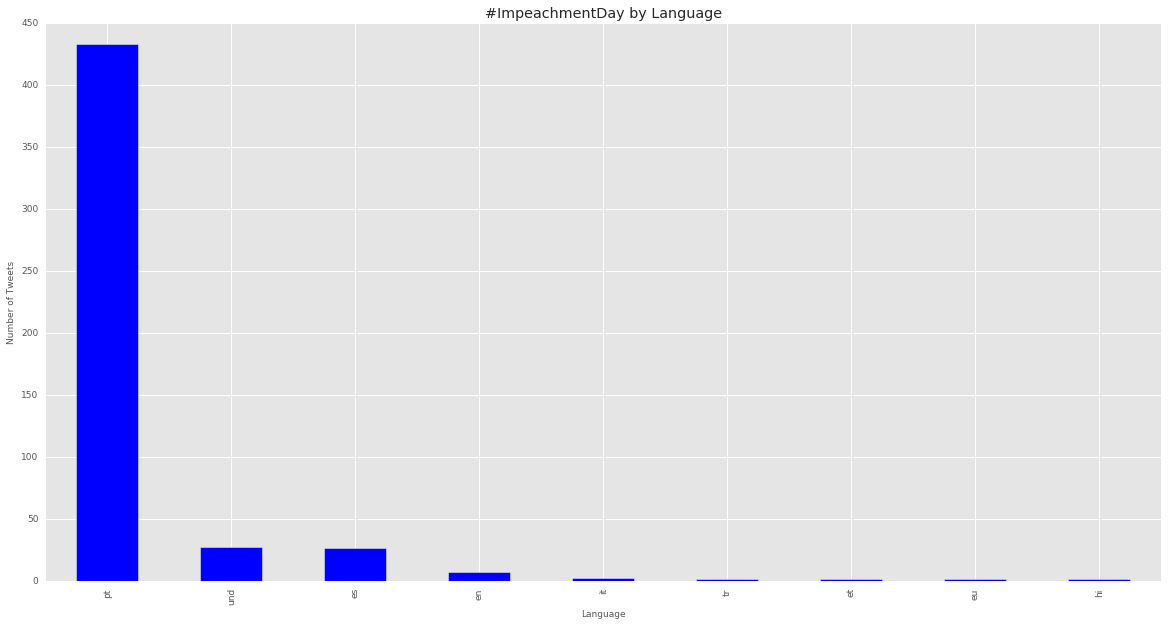

In [28]:
def plot_tweets_per_category(category, title, x_title, y_title, top_n=5, output_filename="plot.png"):
    """
    :param category: Category plotted, can be tweets users, tweets language, tweets country etc ..
    :param title: Title of the plot
    :param x_title: List of the items in x
    :param y_title: Title of the variable plotted
    :return: a plot that we can save as pdf or png instead of displaying to the screen
    """
    tweets_by_cat = category.value_counts()
    fig, ax = plt.subplots()
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    ax.set_title(title)
    tweets_by_cat[:top_n].plot(ax=ax, kind='bar')
    fig.savefig(output_filename)
    fig.show()

plot_tweets_per_category(tweets['lang'], "#ImpeachmentDay by Language", 
                         "Language", 
                         "Number of Tweets", 
                         2000,
                         "mozsprint_per_language.png")


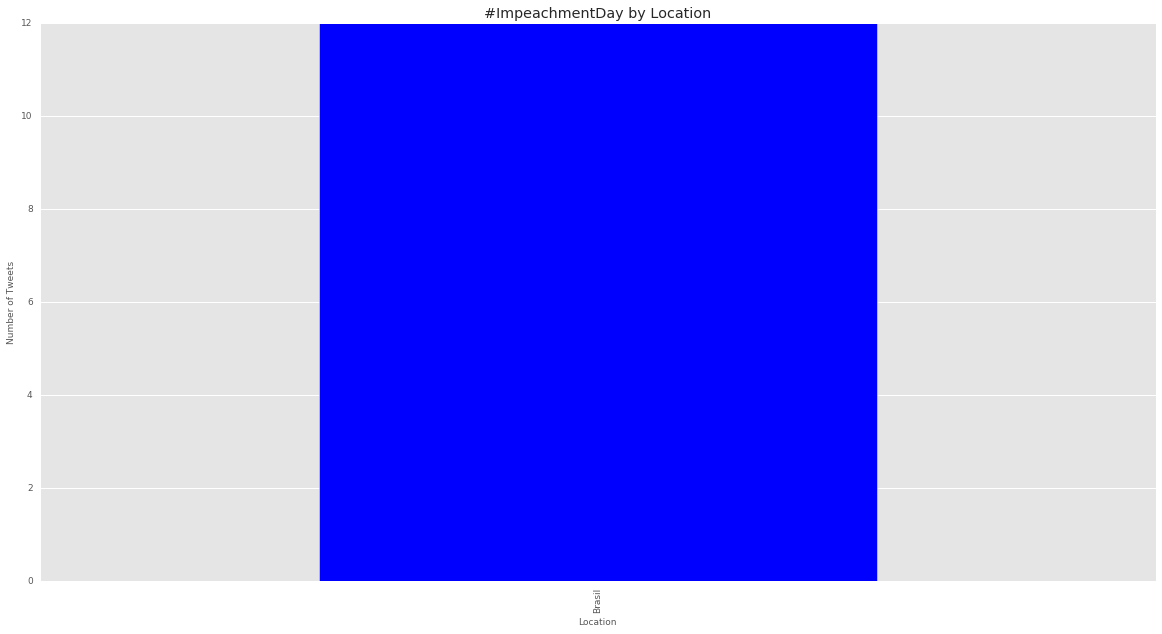

In [29]:
plot_tweets_per_category(tweets['Location'], 
                             "#ImpeachmentDay by Location", 
                             "Location", 
                             "Number of Tweets", 2000,
                             "ImpeachmentDay_per_location.png")

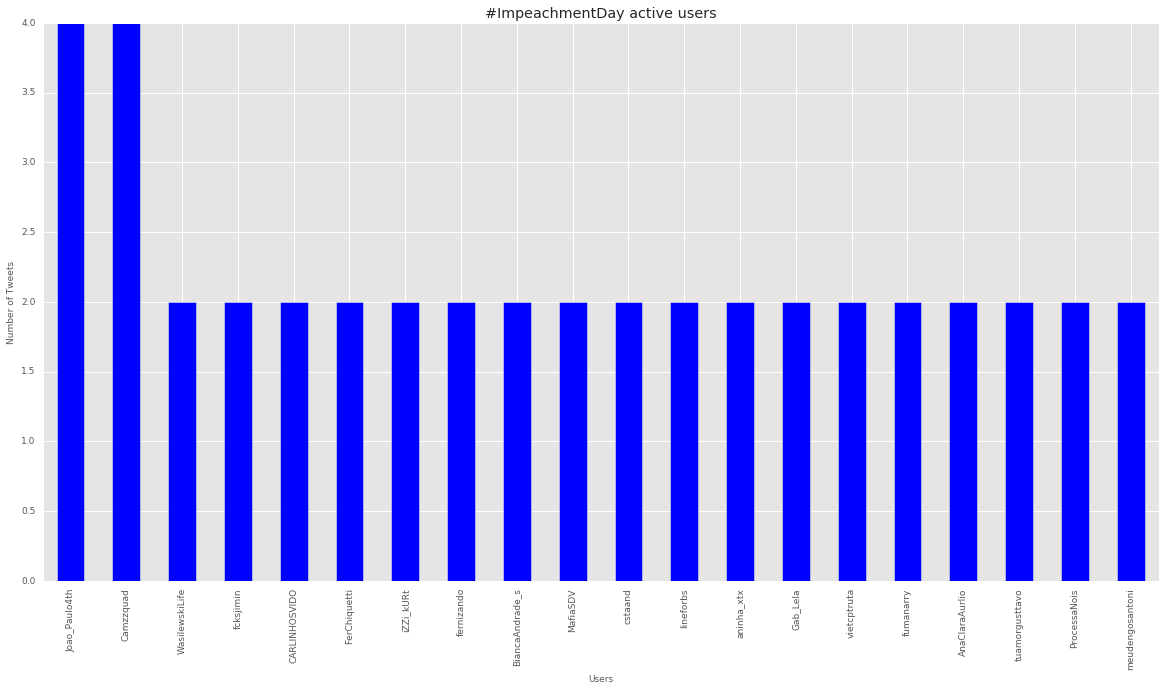

In [30]:
plot_tweets_per_category(tweets['user'], 
                             "#ImpeachmentDay active users", 
                             "Users", 
                             "Number of Tweets", 20,
                             "ImpeachmentDay_users.png")


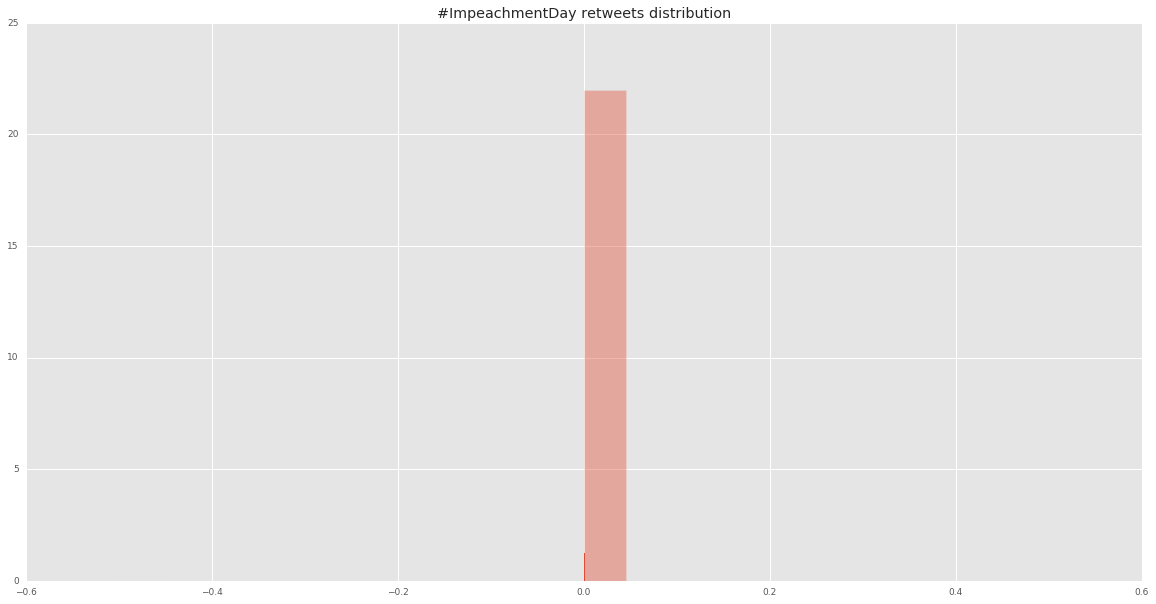

In [31]:
def plot_distribution(category, title, x_title, y_title, output_filename="plot.png"):
        """
        :param category: Category plotted, can be users, language, country etc ..
        :param title: Title of the plot
        :param x_title: List of the items in x
        :param y_title: Title of the variable plotted
        :return: a plot that we can save as pdf or png instead of displaying to the screen
        """
        fig, ax = plt.subplots()
        ax.tick_params(axis='x')
        ax.tick_params(axis='y')
        ax.set_xlabel(x_title)
        ax.set_ylabel(y_title)
        ax.set_title(title)
        sns.distplot(category.values, rug=True, hist=True);
        fig.savefig(output_filename)


plot_distribution(tweets['retweet_count'], 
                      "#ImpeachmentDay retweets distribution", "", "",
                      "retweets_distribution.png")

In [32]:
df = pd.DataFrame(tweets['created_at'].value_counts(), columns=['number_tweets'])
df['date'] = df.index
df.head()

days = [item.split(" ")[0] for item in df['date'].values]
df['days'] = days
grouped_tweets = df[['days', 'number_tweets']].groupby('days')
tweet_growth = grouped_tweets.sum()
tweet_growth['days']= tweet_growth.index

tweet_growth

,number_tweets,days


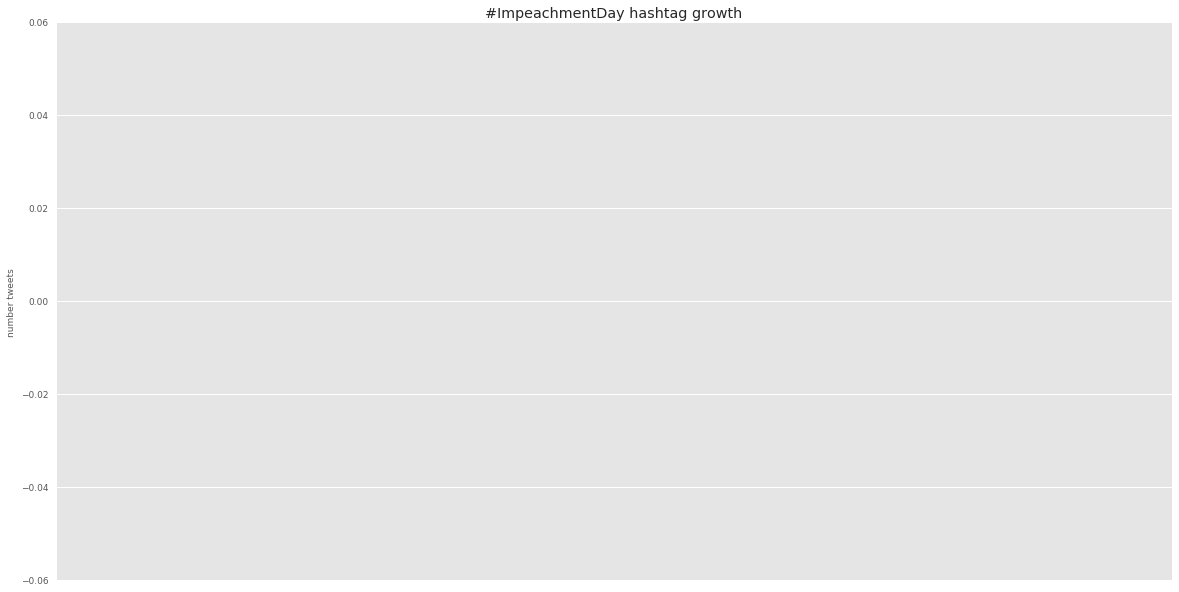

In [33]:
import numpy as np
fig = plt.figure()
ax = plt.subplot(111)
x_pos = np.arange(len(tweet_growth['days'].values))
ax.bar(x_pos, tweet_growth['number_tweets'].values, align='center')
ax.set_xticks(x_pos)
ax.set_title('#ImpeachmentDay hashtag growth')
ax.set_ylabel("number tweets")
ax.set_xticklabels(tweet_growth['days'].values)
fig.savefig('ImpeachmentDay.png')

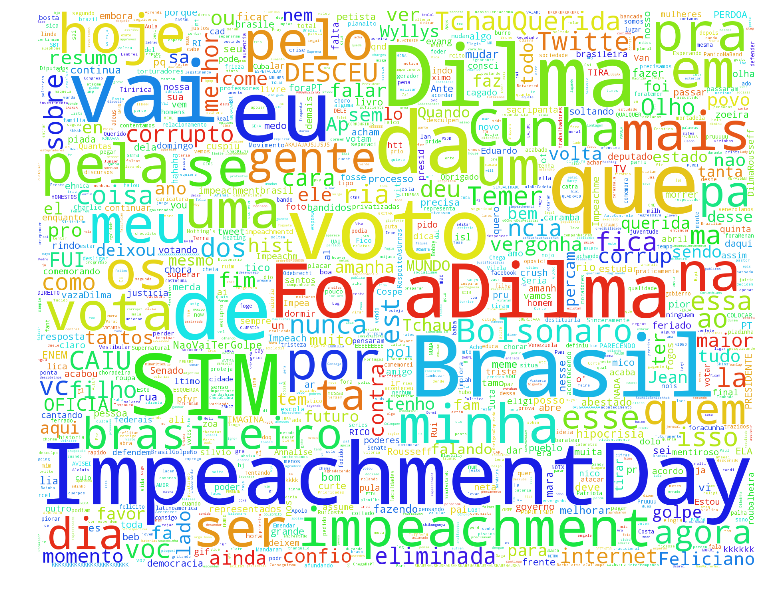

In [34]:
text = " ".join(tweets['text'].values.astype(str))

no_urls_no_tags = " ".join([word for word in text.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(background_color="white", max_words=2000,
                      stopwords=STOPWORDS, width=1800, height=1400).generate(no_urls_no_tags)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

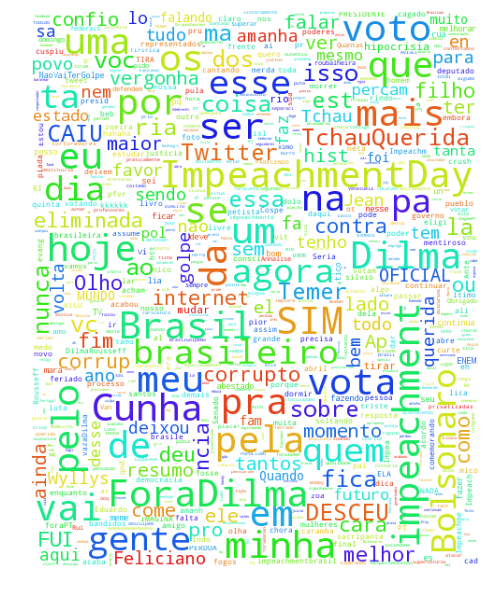

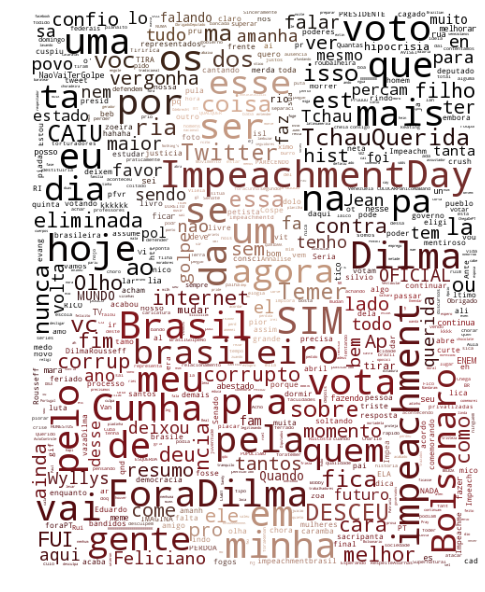

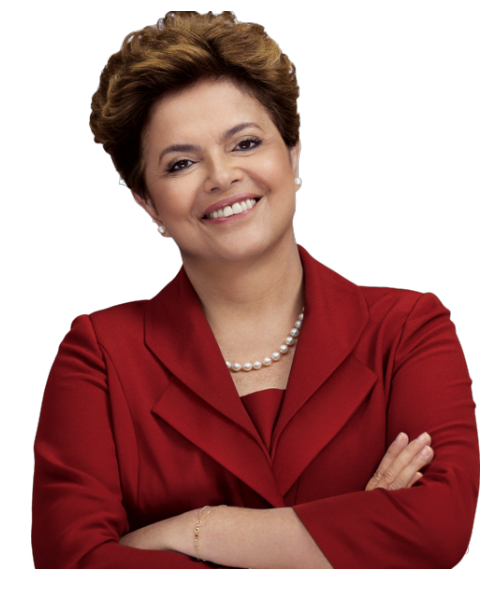

In [35]:
from os import path

text = " ".join(tweets['text'].values.astype(str))

no_urls_no_tags = " ".join([word for word in text.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

tweet_coloring = imread(path.join("dilma2.png"))

wc = WordCloud(background_color="white", max_words=2000, mask=tweet_coloring,
               stopwords=STOPWORDS, max_font_size=40, random_state=42)

wc.generate(no_urls_no_tags)

image_colors = ImageColorGenerator(tweet_coloring)
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.savefig('mozsprint.png', dpi=300)
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
plt.figure()
plt.imshow(tweet_coloring, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

* * *
* * *

## Dados minerados anteriormente - OK!

In [ ]:
tweets = pd.DataFrame()

tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country']
                        if tweet['place'] != None else None, tweets_data)

tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots(figsize=(20,10))
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Línguas'.decode('utf-8'), fontsize=20)
ax.set_ylabel('Número de tweets'.decode('utf-8') , fontsize=20)
ax.set_title('Top 4 Línguas'.decode('utf-8'), fontsize=20, fontweight='bold')
tweets_by_lang[:4].plot(ax=ax, kind='bar', color='mediumspringgreen')
plt.grid()


In [ ]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots(figsize=(20,10))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Países'.decode('utf-8'), fontsize=20)
ax.set_ylabel('Número de tweets'.decode('utf-8') , fontsize=20)
ax.set_title('Top 5 Países'.decode('utf-8'), fontsize=20, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='lightskyblue')
plt.grid()

In [ ]:
import re


def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

tweets['NaoVaiTerGolpe'] = tweets['text'].apply(lambda tweet: word_in_text('NaoVaiTerGolpe', tweet))
tweets['TchauQuerida'] = tweets['text'].apply(lambda tweet: word_in_text('TchauQuerida', tweet))
tweets['ForaDilma'] = tweets['text'].apply(lambda tweet: word_in_text('ForaDilma', tweet))
# tweets['BrasilContraOGolpe'] = tweets['text'].apply(lambda tweet: word_in_text('BrasilContraOGolpe', tweet))
# tweets['ForaCunha'] = tweets['text'].apply(lambda tweet: word_in_text('ForaCunha', tweet))

# print tweets['FicaQuerida'].value_counts()[True]
# print tweets['NaoVaiTerGolpe'].value_counts()[True]
# print tweets['ForaPT'].value_counts()[True]

# hashtags = ['ForaDilma', 'NaoVaiTerGolpe', 'TchauQuerida', 'BrasilContraOGolpe', 'ForaCunha']
hashtags = ['ForaDilma', 'NaoVaiTerGolpe', 'TchauQuerida']
tweets_by_hashtags = [tweets['ForaDilma'].value_counts()[True],
                      tweets['NaoVaiTerGolpe'].value_counts()[True],
                      tweets['TchauQuerida'].value_counts()[True]]
#                       tweets['BrasilContraOGolpe'].value_counts()[True],
#                       tweets['ForaCunha'].value_counts()[True]]

plt.subplots(figsize=(9,9))
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.03, 0.03, 0.03)
plt.pie(tweets_by_hashtags, explode=explode, labels=hashtags, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.rcParams['font.size'] = 12
plt.legend(tweets_by_hashtags, loc=(1,.6))
plt.axis('equal')
plt.show()

In [ ]:
tweets['nao'] = tweets['text'].apply(lambda tweet: word_in_text('nao', tweet))
tweets['sim'] = tweets['text'].apply(lambda tweet: word_in_text('sim', tweet))

tweets['ImpeachmentDay'] = tweets['text'].apply(lambda tweet: word_in_text('sim', tweet) 
                                          or word_in_text('nao', tweet))

# print tweets['nao'].value_counts()[True]
# print tweets['sim'].value_counts()[True]
# print tweets['ImpeachmentDay'].value_counts()[True]

# print tweets[tweets['ImpeachmentDay'] == True]['ForaDilma'].value_counts()[True]
# print tweets[tweets['ImpeachmentDay'] == True]['NaoVaiTerGolpe'].value_counts()[True]

hashtags = ['ForaDilma', 'NaoVaiTerGolpe']
tweets_by_hashtags = [tweets[tweets['ImpeachmentDay'] == True]['ForaDilma'].value_counts()[True], 
                      tweets[tweets['ImpeachmentDay'] == True]['NaoVaiTerGolpe'].value_counts()[True]]

x_pos = list(range(len(hashtags)))
width = 0.7
fig, ax = plt.subplots(figsize=(10,10))
plt.bar(x_pos, tweets_by_hashtags, width, alpha=1, color='sienna')
ax.set_ylabel('Número de tweets'.decode('utf-8'), fontsize=20)
ax.set_title('Ranking: ForaDilma vs. NaoVaiTerGolpe (Votação SIM x NÃO)'.decode('utf-8'),
             fontsize=15, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(hashtags)
plt.grid()

In [ ]:
def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

tweets['link'] = tweets['text'].apply(lambda tweet: extract_link(tweet))

tweets_relevant = tweets[tweets['ImpeachmentDay'] == True]
tweets_relevant_with_link = tweets_relevant[tweets_relevant['link'] != '']

print tweets_relevant_with_link[tweets_relevant_with_link['TchauQuerida'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['ForaDilma'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['ForaCunha'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['NaoVaiTerGolpe'] == True]['link']

In [ ]:
tweets['moro'] = tweets['text'].apply(lambda tweet: word_in_text('moro', tweet))
tweets['cunha'] = tweets['text'].apply(lambda tweet: word_in_text('cunha', tweet))
tweets['bolsonaro'] = tweets['text'].apply(lambda tweet: word_in_text('bolsonaro', tweet))
tweets['lula'] = tweets['text'].apply(lambda tweet: word_in_text('lula', tweet))
tweets['temer'] = tweets['text'].apply(lambda tweet: word_in_text('temer', tweet))
tweets['feliciano'] = tweets['text'].apply(lambda tweet: word_in_text('feliciano', tweet))

hashtags = ['Sérgio Moro'.decode('utf-8'), 'Eduardo Cunha', 'Jair Bolsonaro', 'Lula', 'Michel Temer', 'Marcos Feliciano']
tweets_by_hashtags = [tweets['moro'].value_counts()[True],
                      tweets['cunha'].value_counts()[True],
                      tweets['bolsonaro'].value_counts()[True],
                      tweets['lula'].value_counts()[True],
                      tweets['feliciano'].value_counts()[True],
                      tweets['temer'].value_counts()[True]]

plt.subplots(figsize=(8,8))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'peachpuff', 'mediumturquoise']
explode = (0.03, 0.03, 0.03, 0.05, 0.03, 0.03)
plt.pie(tweets_by_hashtags, explode=explode, labels=hashtags, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.rcParams['font.size'] = 12
plt.legend(tweets_by_hashtags, loc='best')
plt.axis('equal')
plt.show()

### Ainda ajustando aqui - Funções de busca de *tweets*, salvar e carregar json

In [ ]:
import io, json

def twitter_search(q, max_results=1000, **kw):
    search_results = twitter_api.search.tweets(q=q, count=1000, **kw)
    
    statuses = search_results['statuses']
    
    max_results = min(10000, max_results)
    
    for _ in range(10):
        try:
            next_results = search_results['search_metadata']['next_resuts']
        except KeyError, e:
            break
            
        kwargs = dict([ kv.split('=')
                        for kv in next_results[1:].split("&") ])
        
        search_results = twitter_api.search.tweets(**kwargs)
        statuses += search_results['statuses']
        
        if len(statuses) > max_results:
            break
            
    return statuses

twitter_api = oauth_login()

q = 'ForaInternetLimitada'
results = twitter_search(twitter_api, q, max_results=1000)

print json.dumps(results[0], indent=1)
                    
    

In [ ]:
def save_json(filename, data):
    with io.open('data/{0}.json'.format(filename),
                 'w', encoding='utf-8') as f:
            f.write(unicode(json.dumps(data, ensure_ascii=False)))
    
def load_json(filename):
    with io.open('data/{0}.json'.format(filename),
                  encoding='utf-8') as f:
            return f.read()

q = 'ForaInternetLimitada'



twitter_api = oauth_login()
results = twitter_search(twitter_api, q, max_results=1000)

save_json(q, results)
results = load_json(q)

# print json.dumps(results, indent=1)

# print json.dumps(br_trends, indent=1)

